In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# print(len(origin[:][:]))
# print(origin)


(444, 700, 3)
(440, 700, 3)


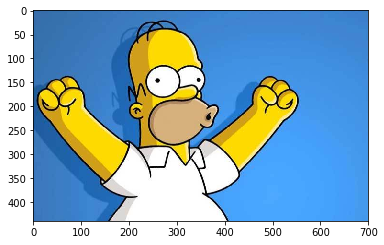

In [2]:
origin = cv2.imread(r'./1.jpg')
img = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

re_w = (w//10) * 10
re_h = (h//10) * 10

img = cv2.resize(img, (re_w, re_h))

# cv2.imshow("1", origin)
# cv2.waitKey(0)
print(origin.shape)
print(img.shape)

plt.imshow(img)
# plt.show()

In [3]:
w, h = img.shape[:2]
print(w, h)

440 700


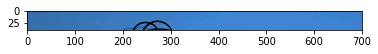

In [4]:
cut_img = img[0:40, :]
plt.imshow(cut_img)

In [5]:
cut_size = 30

row_loop = int(img.shape[0]/cut_size)
column_loop = int(img.shape[1]/cut_size)

In [6]:
hcuted = []
for i in range(cut_size):
    hcuted.append(img[i*row_loop:i*row_loop+row_loop,:])

In [7]:
test = np.asarray(hcuted)
test[1].shape
len(hcuted)

30

In [23]:
hcut = []
for i in range(0, cut_size, 2):
    hcut.extend(hcuted[i])
    
for i in range(1, cut_size, 2):
    hcut.extend(hcuted[i])
    
hcut.extend(hcuted[-1])
# hcut = cv2.vconcat((cuted[0], cuted[2], cuted[4], cuted[6], cuted[8], cuted[1], cuted[3], cuted[5], cuted[7], cuted[9]))

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29


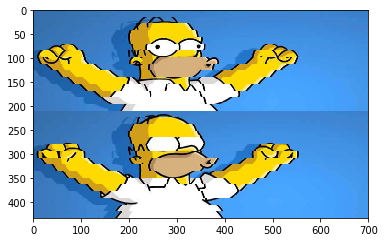

In [9]:
plt.imshow(hcut)

In [10]:
hcut = np.asarray(hcut)

dst = cv2.transpose(hcut) # 행렬 변경 
dst = cv2.flip(dst, 1)

hcut.shape

(434, 700, 3)

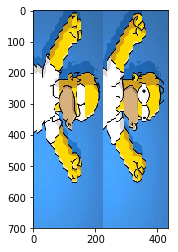

In [11]:
plt.imshow(dst)

In [12]:
dst.shape

(700, 434, 3)

In [13]:
vcuted = []
for i in range(cut_size):
    vcuted.append(dst[ i*column_loop:i*column_loop+column_loop, :])
    

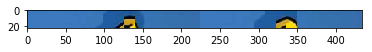

In [14]:
plt.imshow(vcuted[0])

In [15]:
test = np.asarray(vcuted)
test[1].shape
# len(cuted)

(23, 434, 3)

In [16]:
len(vcuted)

30

In [17]:
vcut = []
for i in range(0, cut_size, 2):
    vcut.extend(vcuted[i])
    
for i in range(1, cut_size, 2):
    vcut.extend(vcuted[i])

vcut.extend(vcuted[-1])
    
# hcut = cv2.vconcat((cuted[0], cuted[2], cuted[4], cuted[6], cuted[8], cuted[1], cuted[3], cuted[5], cuted[7], cuted[9]))

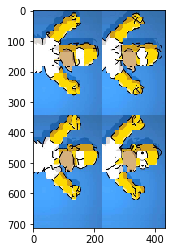

In [18]:
plt.imshow(vcut)

In [19]:
vcut = np.asarray(vcut)

dst = cv2.transpose(vcut) # 행렬 변경 
dst = cv2.flip(dst, 0)

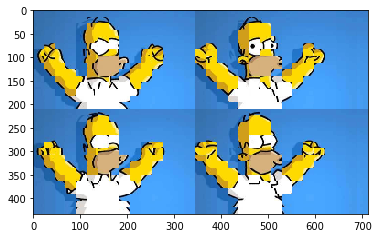

In [20]:
plt.imshow(dst)

In [21]:
vcut.shape

(713, 434, 3)

In [51]:
def cut_shuffle_img(img, cut_size):
#     img = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    re_w = (w//10) * 10
    re_h = (h//10) * 10

    img = cv2.resize(img, (re_w, re_h))

    row_loop = int(img.shape[0]/cut_size)
    column_loop = int(img.shape[1]/cut_size)
    
    
    # horizontal split
    hcuted = []
    for i in range(cut_size):
        hcuted.append(img[i*row_loop:i*row_loop+row_loop,:])
    
    # horizontal split merge
    hcut = []
    for i in range(0, cut_size, 2):
        hcut.extend(hcuted[i])

    for i in range(1, cut_size, 2):
        hcut.extend(hcuted[i])

    hcut.extend(hcuted[-1])
    
    
    # rotate img 90 degree
    hcut = np.asarray(hcut)

    dst = cv2.transpose(hcut) # 행렬 변경 
    dst = cv2.flip(dst, 1)
    

    # vertical split
    vcuted = []
    for i in range(cut_size):
        vcuted.append(dst[ i*column_loop:i*column_loop+column_loop, :])
        
    # vertical merge
    vcut = []
    for i in range(0, cut_size, 2):
        vcut.extend(vcuted[i])
    
    for i in range(1, cut_size, 2):
        vcut.extend(vcuted[i])

    vcut.extend(vcuted[-1])

    # rotate img to origin shape
    vcut = np.asarray(vcut)

    dst = cv2.transpose(vcut) # 행렬 변경 
    result = cv2.flip(dst, 0)
    
    return result

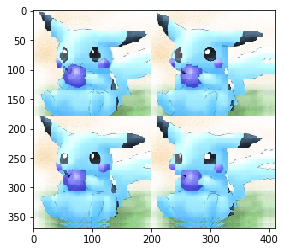

In [52]:
origin = cv2.imread(r'./2.jpg')

img = cut_shuffle_img(origin, 40)
plt.imshow(img)

In [53]:
cv2.imwrite("./imgs/picachu2.jpg", img )

True